In [10]:
import pandas as pd
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("diabetes.csv")

In [7]:
plt.show()

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
diabetes_scaled = (df.drop('Outcome', axis=1) - df.drop('Outcome', axis=1).mean()) / df.drop(columns='Outcome').std()
diabetes_scaled['Outcome'] = df['Outcome']
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [14]:
diabetes_yes = df[(df['Outcome'] == 1)]
diabetes_yes.info()
diabetes_no = df[(df['Outcome'] == 0)]
diabetes_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               268 non-null    int64  
 1   Glucose                   268 non-null    int64  
 2   BloodPressure             268 non-null    int64  
 3   SkinThickness             268 non-null    int64  
 4   Insulin                   268 non-null    int64  
 5   BMI                       268 non-null    float64
 6   DiabetesPedigreeFunction  268 non-null    float64
 7   Age                       268 non-null    int64  
 8   Outcome                   268 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

In [27]:
#1. Are insulin levels greater than patients without one that have diabetes?

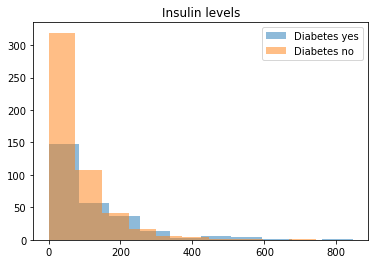

In [18]:
plt.hist(diabetes_yes['Insulin'], alpha = .5, label = "Diabetes yes")
plt.hist(diabetes_no['Insulin'], alpha = .5, label = "Diabetes no")
plt.legend(loc="upper right")
plt.title("Insulin levels")
plt.show()

In [23]:
#2. Are diabetic patients higher in glucose levels on average than patients without diabetes?

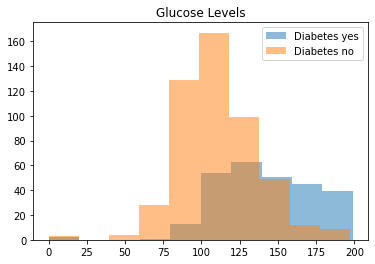

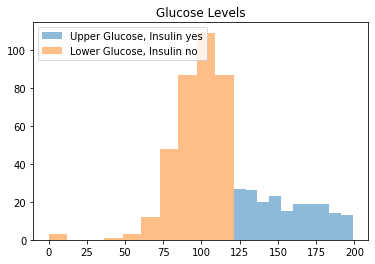

In [20]:
plt.hist(diabetes_yes['Glucose'], alpha = .5, label = "Diabetes yes")
plt.hist(diabetes_no['Glucose'], alpha = .5, label = "Diabetes no")
plt.legend(loc="upper right")
plt.title('Glucose Levels')
plt.show()

upper_Glucose_diabetes_yes_filtered_glucose = diabetes_yes[diabetes_yes['Glucose'] >= 121]
lower_Glucose_diabetes_no_filtered_glucose = diabetes_no[diabetes_no['Glucose'] <= 121]
plt.hist(upper_Glucose_diabetes_yes_filtered_glucose['Glucose'], alpha = .5, label = "Upper Glucose, Insulin yes")
plt.hist(lower_Glucose_diabetes_no_filtered_glucose['Glucose'], alpha = .5, label = "Lower Glucose, Insulin no")
plt.legend(loc="upper left")
plt.title('Glucose Levels')
plt.show()

In [26]:
#3. Are diabetic patients higher in age on average than patients without diabetes?

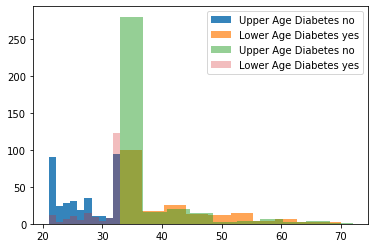

In [21]:
upper_Age_diabetes_yes_filtered_glucose = upper_Glucose_diabetes_yes_filtered_glucose[upper_Glucose_diabetes_yes_filtered_glucose[['Age']] > 33.0].fillna(33)
lower_Age_diabetes_yes_filtered_glucose = upper_Glucose_diabetes_yes_filtered_glucose[upper_Glucose_diabetes_yes_filtered_glucose[['Age']] < 33.0].fillna(33)

lower_Age_diabetes_no_filtered_glucose = lower_Glucose_diabetes_no_filtered_glucose[lower_Glucose_diabetes_no_filtered_glucose[['Age']] < 33.0].fillna(33)
upper_Age_diabetes_no_filtered_glucose = lower_Glucose_diabetes_no_filtered_glucose[lower_Glucose_diabetes_no_filtered_glucose[['Age']] > 33.0].fillna(33)

plt.hist(lower_Age_diabetes_no_filtered_glucose['Age'], alpha = .9, label = "Upper Age Diabetes no")
plt.hist(upper_Age_diabetes_yes_filtered_glucose['Age'], alpha = .7, label = "Lower Age Diabetes yes")
plt.hist(upper_Age_diabetes_no_filtered_glucose['Age'], alpha = .5, label = "Upper Age Diabetes no")
plt.hist(lower_Age_diabetes_yes_filtered_glucose['Age'], alpha = .3, label = "Lower Age Diabetes yes")

plt.legend(loc="upper right")
plt.show()

In [24]:
#4. Are diabetic patients higher in BMI on average than patients without diabetes?

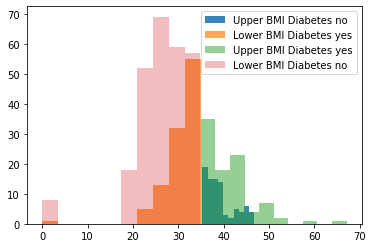

In [22]:
upper_BMI_diabetes_yes_filtered_glucose = upper_Glucose_diabetes_yes_filtered_glucose[upper_Glucose_diabetes_yes_filtered_glucose[['BMI']] >= 35.0]
lower_BMI_diabetes_yes_filtered_glucose = upper_Glucose_diabetes_yes_filtered_glucose[upper_Glucose_diabetes_yes_filtered_glucose[['BMI']] <= 35.0]

lower_BMI_diabetes_no_filtered_glucose = lower_Glucose_diabetes_no_filtered_glucose[lower_Glucose_diabetes_no_filtered_glucose[['BMI']] <= 35.0]
upper_BMI_diabetes_no_filtered_glucose = lower_Glucose_diabetes_no_filtered_glucose[lower_Glucose_diabetes_no_filtered_glucose[['BMI']] >= 35.0]

plt.hist(upper_BMI_diabetes_no_filtered_glucose['BMI'], alpha = .9, label = "Upper BMI Diabetes no")
plt.hist(lower_BMI_diabetes_yes_filtered_glucose['BMI'], alpha = .7, label = "Lower BMI Diabetes yes")
plt.hist(upper_BMI_diabetes_yes_filtered_glucose['BMI'], alpha = .5, label = "Upper BMI Diabetes yes")
plt.hist(lower_BMI_diabetes_no_filtered_glucose['BMI'], alpha = .3, label = "Lower BMI Diabetes no")

plt.legend(loc="upper right")
plt.show()
#plt.savefig('Upper_lower_BMI_diabetes_no_filtered_glucose.jpg')